# 영상처리

In [1]:
# !dir/w

In [2]:
import cv2
import os

video_path = "C:\\kjw\\old_scada.mp4"
outer_dir = "C:\\kjw\\frames"

# 저장폴더 없으면 생성
os.makedirs(outer_dir, exist_ok=True)

# 비디오 캡처 객체 생성
cap = cv2.VideoCapture(video_path)

frame_count = 0
while True:
    ret, frame = cap.read()                           # 두가지 값 리턴
    if not ret: break
    # 프레임 파일명 지정
    frame_filename = os.path.join(outer_dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)
    frame_count += 1

cap.release()
print(f"총 {frame_count}개의 프레임을 추출하였습니다.")


총 1337개의 프레임을 추출하였습니다.


첫프레임 출력성공


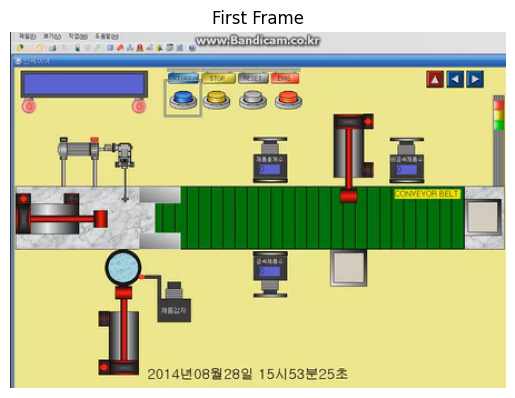

In [3]:
# 첫 프레임 출력

import matplotlib.pyplot as plt
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if ret:
    print("첫프레임 출력성공")
    # print(frame)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.title("First Frame")
    plt.axis("off")
    plt.show()

cap.release()

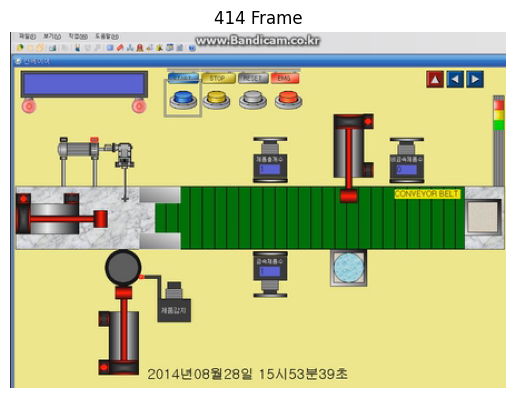

In [4]:
# 특정 프레임 이동 후 저장
cap = cv2.VideoCapture(video_path)
position = 414
cap.set(cv2.CAP_PROP_POS_FRAMES, position)
ret , frame = cap.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()

cv2.imwrite("C:\\kjw\\frame_choice.jpg", frame)
plt.imshow(rgb)
plt.title(f"{position} Frame")
plt.axis("off")
plt.show()

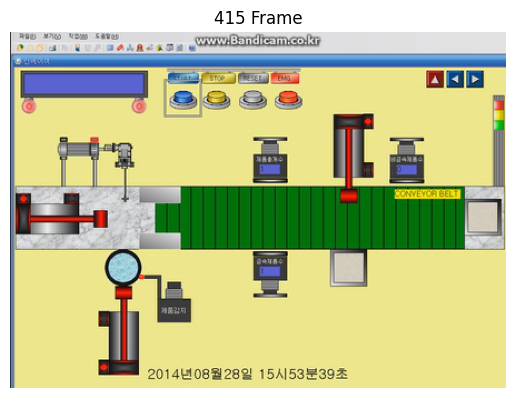

In [5]:
# 특정 프레임 이동 후 저장
cap = cv2.VideoCapture(video_path)
position = 415
cap.set(cv2.CAP_PROP_POS_FRAMES, position)
ret , frame = cap.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()

cv2.imwrite("C:\\kjw\\frame_choice2.jpg", frame)
plt.imshow(rgb)
plt.title(f"{position} Frame")
plt.axis("off")
plt.show()

In [6]:
print("프레임 크기", frame.shape)

프레임 크기 (320, 446, 3)


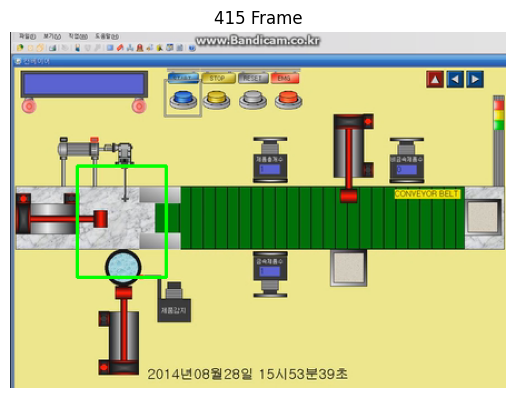

In [7]:
# ROI 정의 (x,y,w,h) -> (왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이)
# 60, 120
cap = cv2.VideoCapture(video_path)

roi = (60,120, 80, 100)
x , y, w, h = roi
cv2.rectangle(frame , (x,y), (x + w, y + h), (0, 255, 0), 2)        # 화면에다가 사각형 모양의 ROI 삽입, 초록색 , 굵기는 2

rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()

plt.imshow(rgb)
plt.title(f"{position} Frame")
plt.axis("off")
plt.show()

In [12]:
# ROI 정의 (x,y,w,h) -> (왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이)
# 60, 120
import os
import cv2

roi_dir = "C:\\kjw\\frame_ROI"

os.makedirs(roi_dir, exist_ok = True)

cap = cv2.VideoCapture(video_path)
roi1 = (60,120, 80, 100)
roi2 = (211,86, 167, 158)
x1 , y1, w1, h1 = roi1
x2 , y2, w2, h2 = roi2

frame_count = 0
while True:
    ret , frame = cap.read()
    if not ret:
        break
    cv2.rectangle(frame , (x1,y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)        
    cv2.rectangle(frame , (x2,y2), (x2 + w2, y2 + h2), (0, 0, 255), 1)

    roi_filename = os.path.join(roi_dir,f"frame_ROI_{frame_count:04d}.jpg")
    cv2.imwrite(roi_filename, frame)

    frame_count += 1
cap.release()
print(f"총 {frame_count}개의 프레임을 ROI 마킹하여 저장하였습니다.")

#plt.imshow(rgb)
#plt.title(f"{position} Frame")
#plt.axis("off")
#plt.show()

총 1337개의 프레임을 ROI 마킹하여 저장하였습니다.


In [13]:
# ROI 정의 (x,y,w,h) -> (왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이)
# 60, 120
import os
import cv2

roi_dir = "C:\\kjw\\frame_ROI"

roi1_dir = os.path.join(roi_dir, "ROI1")
roi2_dir = os.path.join(roi_dir, "ROI2")

os.makedirs(roi_dir, exist_ok = True)
os.makedirs(roi1_dir, exist_ok = True)
os.makedirs(roi2_dir, exist_ok = True)

cap = cv2.VideoCapture(video_path)
roi1 = (60,120, 80, 100)
roi2 = (211,86, 167, 158)
x1 , y2, w1, h1 = roi1
x2 , y2, w2, h2 = roi2

frame_count = 0
while True:
    ret , frame = cap.read()
    if not ret:
        break

    # ROI 마킹포함 전체 프레임
    cv2.rectangle(frame , (x1,y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)        
    cv2.rectangle(frame , (x2,y2), (x2 + w2, y2 + h2), (0, 0, 255), 1)
    roi_filename = os.path.join(roi_dir,f"frame_ROI_{frame_count:04d}.jpg")
    cv2.imwrite(roi_filename, frame)

    # ROI1만 크롭해서 저장
    roi1_crop = frame[y1:y1 + h1 , x1:x1 + w1]                                      # x와 y의 값이 뒤집어져있다. -> [y,x] 형태
    roi1_filename = os.path.join(roi1_dir,f"ROI1_{frame_count:04d}.jpg")
    cv2.imwrite(roi1_filename, roi1_crop)
    
    # ROI1만 크롭해서 저장
    roi2_crop = frame[y2:y2 + h2 , x2:x2 + w2]                                      # x와 y의 값이 뒤집어져있다. -> [y,x] 형태
    roi2_filename = os.path.join(roi2_dir,f"ROI2_{frame_count:04d}.jpg")
    cv2.imwrite(roi2_filename, roi2_crop)

    frame_count += 1
cap.release()
print(f"총 {frame_count}개의 프레임을 ROI 마킹한 프레임과 개별 ROI 크롭들을 저장하였습니다.")

#plt.imshow(rgb)
#plt.title(f"{position} Frame")
#plt.axis("off")
#plt.show()

총 1337개의 프레임을 ROI 마킹한 프레임과 개별 ROI 크롭들을 저장하였습니다.
